# A Demo of using RDMC with XYZs
Author: Xiaorui Dong

This notebook demonstrates how RDMC handles XYZ. Molecules can be perceived by using [openbabel](http://openbabel.org/wiki/Main_Page) / [xyz2mol](https://github.com/jensengroup/xyz2mol). The created molecule can be visualized by `mol_viewer` and exported to xyz format.

In [3]:
from rdmc.mol import Mol
from rdtools.view import mol_viewer
from rdkit.Chem.Draw import IPythonConsole

## 1. An example of XYZ block

In [4]:
######################################
# INPUT
xyz="""14

C         -1.77596        0.55032       -0.86182
C         -1.86964        0.09038       -2.31577
H         -0.88733        1.17355       -0.71816
H         -1.70996       -0.29898       -0.17103
O         -2.90695        1.36613       -0.53334
C         -0.58005       -0.57548       -2.76940
H         -0.35617       -1.45641       -2.15753
H          0.26635        0.11565       -2.71288
H         -0.67469       -0.92675       -3.80265
O         -2.92111       -0.86791       -2.44871
H         -2.10410        0.93662       -2.97107
O         -3.87923        0.48257        0.09884
H         -4.43402        0.34141       -0.69232
O         -4.16782       -0.23433       -2.64382
"""

xyz_without_header = \
"""O 2.136128  0.058786  -0.999372
C -1.347448  0.039725  0.510465
C 0.116046  -0.220125  0.294405
C 0.810093  0.253091  -0.73937
H -1.530204  0.552623  1.461378
H -1.761309  0.662825  -0.286624
H -1.923334  -0.892154  0.536088
H 0.627132  -0.833978  1.035748
H 0.359144  0.869454  -1.510183
H 2.513751  -0.490247  -0.302535"""
######################################

## 2. Generate an Mol from xyz
**Arguments:**
- `backend`: choose the `openbabel` or `xyz2mol` backend
- `header`: indicate if the str includes lines of atom number and title

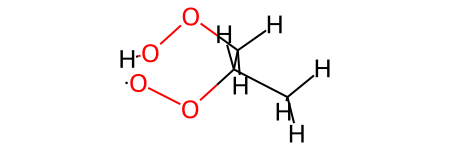

In [5]:
Mol.FromXYZ(xyz, backend='openbabel', header=True)

Next is an example of parsing XYZ without the first two lines (e.g., extracted from gaussian output), where `header` is set to `False`. Please set the `header` arguments correctly according to the input xyz.

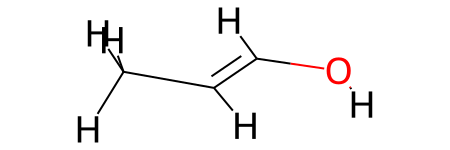

In [6]:
Mol.FromXYZ(xyz_without_header, backend='openbabel', header=False)

Use `xyz2mol` backend. For most cases, xyz2mol's method returns the same molecule as using `openbabel` backend

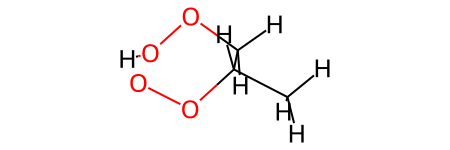

In [8]:
Mol.FromXYZ(xyz, backend='xyz2mol', header=True)

The optional arguments for the xyz2mol method are provided. Note, RDKit starts to have a native xyz2mol since version 2022.09, but you can choose to use the original python version (with minor modifications to work with RDMC) with `force_rdmc = True`. The reason to support both is that (1) we introduce the python version to rdmc since 2021 and (2) RDKit's native is not always reliable (e.g., rdkit-2023.09.6-macosarm64 version run into erros)

!!! Warning !!! Distance between atoms 13 and 12 (0.976551 A) is suspicious.


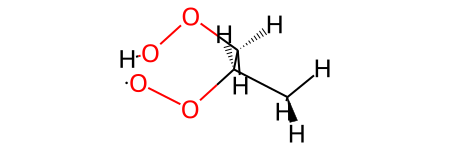

In [12]:
Mol.FromXYZ(
    xyz,
    backend='xyz2mol',
    header=True,
    allow_charged_fragments=False,  # radical => False
    use_graph=True,  # Use networkx to accelerate (enabled by default)
    use_huckel=True,  # Use extended Huckel bond orders to locate bonds
    embed_chiral=True,  # Embed chiral information
    force_rdmc=True,  # use RDMC's implementation of xyz2mol
)

## 3. Check the coordinates of the molecule and visualize it

In [15]:
mol = Mol.FromXYZ(xyz)
print(f'xyz coordinate: \n{mol.GetPositions(confId=0)}')

xyz coordinate: 
[[-1.77596  0.55032 -0.86182]
 [-1.86964  0.09038 -2.31577]
 [-0.88733  1.17355 -0.71816]
 [-1.70996 -0.29898 -0.17103]
 [-2.90695  1.36613 -0.53334]
 [-0.58005 -0.57548 -2.7694 ]
 [-0.35617 -1.45641 -2.15753]
 [ 0.26635  0.11565 -2.71288]
 [-0.67469 -0.92675 -3.80265]
 [-2.92111 -0.86791 -2.44871]
 [-2.1041   0.93662 -2.97107]
 [-3.87923  0.48257  0.09884]
 [-4.43402  0.34141 -0.69232]
 [-4.16782 -0.23433 -2.64382]]


## 4. Export XYZ

In [16]:
print(mol.ToXYZ(header=False))

C     -1.775960    0.550320   -0.861820
C     -1.869640    0.090380   -2.315770
H     -0.887330    1.173550   -0.718160
H     -1.709960   -0.298980   -0.171030
O     -2.906950    1.366130   -0.533340
C     -0.580050   -0.575480   -2.769400
H     -0.356170   -1.456410   -2.157530
H      0.266350    0.115650   -2.712880
H     -0.674690   -0.926750   -3.802650
O     -2.921110   -0.867910   -2.448710
H     -2.104100    0.936620   -2.971070
O     -3.879230    0.482570    0.098840
H     -4.434020    0.341410   -0.692320
O     -4.167820   -0.234330   -2.643820

